# Relazione Finale Progetto Finale Big Data

### Autori: Luca Gregori & Alessandro Wood

### Corso: Big Data


## Indice
- 1 Obiettivi
- 2 Dataset
    - 2.1 Contest
    - 2.2 Acknowledgements
    - 2.3 Colonne
- 3 Architettura
- 4 Tecnologie Utilizzate
    - 4.1 Cassandra
    - 4.2 Docker
    - 4.3 Portainer
- 5 Preprocessing dei dati
- 6 Batch Analysis
- 7 Streaming Analysis
- 8 MLlib
    - 7.1 Delay Prediction
    - 7.2 Cancellation Prediction
- 9 Visualization Layer
    - 9.1 Grafana
    - 9.2 InfluxDB
    - 9.3 Jupyter Visualization for Batch Analysis
- 10 Problematiche
    - 10.1 Dataset
    - 10.2 MLlib
    - 10.3 Grafana
    - 10.4 InfluxDB
    - 10.5 Cassandra
- 11 Osservazioni conclusive
- 12 Riferimenti

## 1 Obiettivi
Analizzare dati inerenti ai voli aerei, sperimentando architetture lambda e nuove tecnologie.

## 2 Dataset
In questo capitolo si descrive il dataset utilizzato.

### 2.1 Contesto
Il dipartimento delle statistiche sui Trasporti degli Stati Uniti d'America monitora le performance dei voli domestici forniti dalle più grandi compagnie aeree.
I dataset (uno per ogni anno dal 2009 al 2019) contengono informazioni quotidiane riguardanti i voli delle suddette compagnie aeree.


### 2.2 Acknowledgements
I dati riguardanti il ritardo e la cancellazione dei voli sono stati "collezionati" e gestiti dal "DOT's Bureau of Transportation Statistics" e sono stati usati solamente i dati utili per l'analisi del ritardo di ogni volo.

### 2.3 Colonne

| Colonna             |                                                                                                              |
|---------------------|--------------------------------------------------------------------------------------------------------------|
| FL_DATE             | Data del volo, espressa nel formato yy/mm/dd                                                                 |
| OP_CARRIER          | Identificativo univoco della compagnia aerea                                                                 |
| OP_CARRIER_FL_NUM   | Numero del volo della compagnia aerea                                                                        |
| ORIGIN              | Codice univoco dell'aereporto di partenza del volo                                                           |
| DEST                | Codice univoco dell'aereoporto di destinazione del volo                                                      |
| CRS_DEP_TIME        | Tempo di partenza pianificato                                                                                |
| DEP_TIME            | Tempo di partenza effettivo                                                                                  |
| DEP_DELAY           | Ritardo complessivo sulla partenza, espresso in minuti                                                       |
| TAXI_OUT            | Tempo trascorso tra la partenza dall'aereporto di origine e l'instante WHEELS_OFF                            |
| WHEELS_OFF          | Instante in cui le ruote dell'aereoplano si staccano da terra                                                |
| WHEELS_ON           | Instante in cui le ruote dell'aereoplano toccano terra                                                       |
| TAXI_IN             | Tempo trascorso tra  l'instante WHEELS_ON e l'arrivo nell'areoporto di destinazione                          |
| CRS_ARR_TIME        | Tempo di arrivo pianificato                                                                                  |
| ARR_TIME            | Tempo di arrivo effettivo                                                                                    |
| ARR_DELAY           | Ritardo complessivo sull'arrivo (negativo se in anticipo), espresso in minuti                                |
| CANCELLED           | Volo cancellato (1 = cancellato)                                                                             |
| CANCELLATION_CODE   | Motivo della cancellazione del volo: A - Airline/Carrier; B - Weather; C - National Air System; D - Security |
| DIVERTED            | L'eareoplano è atterrato in un aereporto diverso da quello di destinazione                                   |
| CRS_ELAPSED_TIME    | Tempo di volo pianificato                                                                                    |
| ACTUAL_ELAPSED_TIME | Tempo di volo effettivo (AIR_TIME + TAXI_IN + TAXI_OUT)                                                      |
| AIR_TIME            | Periodo durante il quale l'aereoplano si trova in volo. Tempo tra l'instante WHEELS_OFF e WHEELS_ON          |
| DISTANCE            | Distanza tra l'aereporto ORIGIN e l'aereporto DEST                                                           |
| CARRIER_DELAY       | Ritardo causato dalla compagnia aerea, espresso in minuti                                                    |
| WEATHER_DELAY       | Ritardo causato dalle condizioni meteo                                                                       |
| NAS_DELAY           | Ritardo causato dal "air system"                                                                             |
| SECURITY_DELAY      | Ritardo causato da controlli di sicurezza                                                                    |
| LATE_AIRCRAFT_DELAY | Ritardo causato dal ritardo del veivolo                                                                      |
| Unnamed: 27         | Colonna inutile                                                                                              |
| Unnamed: 20         | Colonna inutile                                                                                              |                                                                                            |

**Note**

Il file *2019.csv*, contiene solamente 20 colonne a differenza dei restanti file.
Nel capitolo riguardo il prepocessing dei dati verranno discusse le strategie per uniformare il dataset.
Inoltre si sottolinea che la colonna **Unnamed: 27** è presente solamente nei file csv 2009-2018 e 2020, mentre
**Unnamed: 20** solamente in *2019.csv*

Complessivamente il dataset con i vari csv di cui è composto pesa circa 9GB ed è possibile recuperarlo su kaggle tramite questo [link](https://www.kaggle.com/sherrytp/airline-delay-analysis).


## 3 Architettura

In questo capitolo si parlerà dell'architettura utilizzata per il progetto. Quello che abbiamo sperimentato è una lambda architecture.

- **Streaming Layer**: utilizza un cluster di Kafka e Spark Streaming per effettuare analisi su "live data".
- **Batch Layer**: composto da una fase di preprocessing e batch analysis dei dati. I dati intermedi che vengono "ripuliti" nella fase intermedia saranno salvati su HDFS. L'analisi completa dei dati sarà infine salvata sul cluster di cassandra. In questo layer si farà uso di Spark e Spark ML.
- **Visualization Layer**: layer composto dal notebook di Jupyter e da Grafana. Il primo tramite il connettore *cassandra-driver* mostra con grafici i risultati delle analisi interrogando Cassandra, il secondo invece con il supporto di InfluxDB si occupa di fornire una dashboard per la visualizzazione dei dati processati e non in streaming.

Segue un immagine esplicativa dell'architettura appena descritta:

![Architettura](/home/luca/Progetti/BigDataOnlyFans/imgs/architettura.png "Architettura")

## 4 Tecnologie utilizzate

In questo capitolo si discuteranno delle varie tecnologie utilizzate durante il progetto. Alcune di queste saranno spiegate meglio in altri capitoli.

- **Spark**
- **Spark Streaming**
- **Spark MLlib**
- **Kafka**
- **HDFS Hadoop**
- **Cassandra**
- **Docker**
- **Portainer**
- **Grafana**
- **InfluxDB**

### 4.1 Cassandra
Apache Cassandra è un database distribuito NoSQL a cui si affidano migliaia di aziende per la sua scalabilità e availability che non compromette al contempo le performance.
La sua scalabilità (orizzontale) e tolleranza ai guasti la rende la piattaforma perfetta per mission-critical data.
Cassandra è stata utilizzata per salvare i report generati dalla Batch Analysis e i dati grezzi provenienti dallo Streaming layer.
Per raggiungere tale scopo sono state create due KeySpace:
- BatchKeySpace
- StreamingKeySpace
con strategia 'SimpleStrategy' e con 'replication_factor' pari a 3 (3 nodi di cui 2 seed)

### 4.2 Docker

Docker è un progetto open-source che automatizza il processo di deployment di applicazioni all'interno di contenitori software,
fornendo un'astrazione aggiuntiva grazie alla virtualizzazione a livello di sistema operativo di Linux.

L'utilizzo che si è fatto di Docker è stato quello di usufruire del suo processo automatizzato di deployment per
creare un ambiente di lavoro distribuito. In particolare è stato sperimentato:

- un cluster di server Cassandra, composto da 3 seed.
- un cluster di server Kafka e Zookeeper, composto da 2 elementi.
- un'instanza di influxDB
- un'istanza di Grafana

### 4.3 Portainer
Portainer consente all'utilizzatore di centralizzare la configurazione, la gestione e la sicurezza di ambienti Docker e Kubernetes,
rendendo possibile la distribuzione di "Container-as-a-Service" in modo veloce e sicuro.
L'utilizzo di Portainer ha permesso un corretto monitoraggio dei containers "deployati" nel contesto del progetto.

![Portainer](/home/luca/Progetti/BigDataOnlyFans/imgs/portainer.png "Portainer")

## 5 Preprocessing dei dati

L'obiettivo di questa fase è stato quello di pulire i dati da eventuale rumore e soprattutto quello di uniformare i vari dataset,
per poi unificare il tutto in un unico grande file.

Per ciascun dataset sono state eliminate le colonne inutili: **Unnamed: 20** e **Unnamed: 27** a seconda del caso.

Per il dataset *2019.csv* sono state effettuate le seguenti modifiche:

```python
df_2019 = df_2019.withColumnRenamed("OP_UNIQUE_CARRIER", "OP_CARRIER") \
    .withColumn("ACTUAL_ELAPSED_TIME", col("AIR_TIME") + col("TAXI_IN") + col("TAXI_OUT")) \
    .withColumn("CRS_DEP_TIME", col("DEP_TIME") - col("DEP_DELAY")) \
    .withColumn("CRS_ARR_TIME", col("ARR_TIME") - col("ARR_DELAY")) \
    .withColumn("CRS_ELAPSED_TIME", col("ACTUAL_ELAPSED_TIME") - (col("ARR_DELAY") - col("ARR_DELAY"))) \
    .withColumn("CANCELLED", lit(None)) \
    .withColumn("CANCELLATION_CODE", lit(None)) \
    .withColumn("DIVERTED", lit(None))
```
Le colonne mancanti nel dataset *2019.csv* erano :

- ACTUAL_ELAPSED_TIME
- CRS_DEP_TIME
- CRS_ARR_TIME
- CRS_ELAPSED_TIME
- CANCELLED
- CANCELLATION_CODE
- DIVERTED

Dove non è stato possibile inferire i record (da altre colonne), sono stati inseriti valori nulli (**CANCELLED**, **CANCELLATION_CODE**, **DIVERTED**).

Conclusa questa fase, si prosegue con l'unione di tutti i dataframe spark in uno unico, salvando il risulato finale in un file csv in HDFS.

Per i dettagli si veda lo script *spark-preprocessing.py*

## 6 Batch Analysis
Analisi offline dei dati, effettuata sul dataset "pulito" dopo la fase di preprocessing.
Le analisi che seguiranno sono state effettuata con 4 diverse granuralità di periodo:
- Totale
- Anno
- Anno e Mese
- Giorno della settimana

Si sottolinea che i report sono stati scritti in Spark SQL.

### Delay Analysis per Carrier

Per ciascun **OP_CARRIER**, ovvero ciascuna compagnia aerea, si è calcolato il delay medio per le partenze e per gli arrivi.
Esempio di codice per granuralità di periodo per anno:
```python
delay_year_df = df.select("OP_CARRIER", "FL_DATE", "DEP_DELAY", "ARR_DELAY") \
    .withColumn("YEAR", year("FL_DATE")) \
    .withColumn("DELAY", col("DEP_DELAY") + col("ARR_DELAY")) \
    .groupBy("OP_CARRIER", "YEAR") \
    .agg(avg("DELAY").alias("AVG_DELAY"), avg("DEP_DELAY").alias("AVG_DEP_DELAY"), avg("ARR_DELAY").alias("AVG_ARR_DELAY")) \
    .select("OP_CARRIER", "YEAR", "AVG_DELAY", "AVG_DEP_DELAY", "AVG_ARR_DELAY")
```

### Delay Analysis per Source-Dest
Per ciascuna coppia **ORIGIN** e **DEST**, ovvero ciascuna coppia di aereporti, si è calcolato il delay medio per le partenze e per gli arrivi.

```python
delay_year_src_dest_df = df.select("ORIGIN", "DEST", "FL_DATE", "DEP_DELAY", "ARR_DELAY") \
    .withColumn("YEAR", year("FL_DATE")) \
    .groupBy("ORIGIN", "DEST", "YEAR") \
    .agg(avg("DEP_DELAY").alias("AVG_DEP_DELAY"), avg("ARR_DELAY").alias("AVG_ARR_DELAY")) \
    .select("ORIGIN", "DEST", "YEAR", "AVG_DEP_DELAY", "AVG_ARR_DELAY")
```

### Cancellation & Diverted Analysis per Carrier

Per ciascun **OP_CARRIER**, ovvero ciascuna compagnia aerea, si è calcolata la percentuale di voli cancellati e la percentuale di voli dirottati.
```python
cancellation_year_df = df.select("OP_CARRIER", "FL_DATE", "CANCELLED", "DIVERTED") \
    .withColumn("YEAR", year("FL_DATE")) \
    .groupBy("OP_CARRIER", "YEAR") \
    .agg(count(when(col("CANCELLED") == 1, 1)).alias("CANC_COUNT"), count(when(col("DIVERTED") == 1, 1)).alias("DIV_COUNT"), count("*").alias("COUNT")) \
    .withColumn("DIV_PERC", (col("DIV_COUNT") / col("COUNT") * 100.0)) \
    .withColumn("CANC_PERC", (col("CANC_COUNT") / col("COUNT") * 100.0)) \
    .select("OP_CARRIER", "YEAR", "CANC_PERC", "CANC_COUNT", "DIV_PERC", "DIV_COUNT") \
    .orderBy("YEAR", "OP_CARRIER")
```
### Cancellation & Diverted Analysis per Source-Dest
Per ciascuna coppia **ORIGIN** e **DEST**, ovvero ciascuna coppia di aereporti, si è calcolata la percentuale di voli cancellati e la percentuale di voli dirottati.

```python
cancellation_year_src_dest_df = df.select("ORIGIN", "DEST", "FL_DATE", "CANCELLED", "DIVERTED") \
    .withColumn("YEAR", year("FL_DATE")) \
    .groupBy("ORIGIN", "DEST", "YEAR") \
    .agg(count(when(col("CANCELLED") == 1, 1)).alias("CANC_COUNT"), count(when(col("DIVERTED") == 1, 1)).alias("DIV_COUNT"), count("*").alias("COUNT")) \
    .withColumn("DIV_PERC", (col("DIV_COUNT") / col("COUNT") * 100.0)) \
    .withColumn("CANC_PERC", (col("CANC_COUNT") / col("COUNT") * 100.0)) \
    .select("ORIGIN", "DEST", "YEAR", "CANC_PERC", "CANC_COUNT", "DIV_PERC", "DIV_COUNT") \
    .orderBy("YEAR", "ORIGIN", "DEST")
```
### Distance Analysis per Carrier
Per ciascun **OP_CARRIER**, ovvero ciascuna compagnia aerea, si è calcolata la distanza totale percorsa,
 considerando solamente la distanza in linea d'aria tra gli aereporti.

```python
cancellation_year_src_dest_df = df.select("ORIGIN", "DEST", "FL_DATE", "CANCELLED", "DIVERTED") \
    .withColumn("YEAR", year("FL_DATE")) \
    .groupBy("ORIGIN", "DEST", "YEAR") \
    .agg(count(when(col("CANCELLED") == 1, 1)).alias("CANC_COUNT"), count(when(col("DIVERTED") == 1, 1)).alias("DIV_COUNT"), count("*").alias("COUNT")) \
    .withColumn("DIV_PERC", (col("DIV_COUNT") / col("COUNT") * 100.0)) \
    .withColumn("CANC_PERC", (col("CANC_COUNT") / col("COUNT") * 100.0)) \
    .select("ORIGIN", "DEST", "YEAR", "CANC_PERC", "CANC_COUNT", "DIV_PERC", "DIV_COUNT") \
    .orderBy("YEAR", "ORIGIN", "DEST")
```
### Max consec days of Delay Analysis per Carrier
Per ciascun **OP_CARRIER**, ovvero ciascuna compagnia aerea, si è calcolato il massimo numero di giorni consecutivi in cui c'è stato un volo in ritardo.
```python
max_consec_delay_year_df = df.select("OP_CARRIER", "FL_DATE", "ARR_DELAY") \
    .withColumn("YEAR", year("FL_DATE")) \
    .groupBy("OP_CARRIER", "YEAR", "FL_DATE") \
    .agg(avg(col("ARR_DELAY")).alias("ARR_DELAY")) \
    .filter(col("ARR_DELAY") > 0) \
    .withColumn("ROW_NUMBER", row_number().over(Window.partitionBy("OP_CARRIER", "YEAR").orderBy("OP_CARRIER", "YEAR", "FL_DATE"))) \
    .withColumn("GRP", datediff(col("FL_DATE"), lit("1900-1-1")) - col("ROW_NUMBER")) \
    .withColumn("GIORNI", row_number().over(Window.partitionBy("OP_CARRIER", "YEAR", "GRP").orderBy("OP_CARRIER", "YEAR", "FL_DATE"))) \
    .groupBy("OP_CARRIER", "YEAR") \
    .agg(max(col("GIORNI")).alias("MAX_GIORNI")) \
    .select("OP_CARRIER", "YEAR", "MAX_GIORNI")
```
Si procede con una prima *groupBy* su **OP_CARRIER**, **YEAR** e **FL_DATE**, in modo tale da fare una media dl **ARR_DELAY**.

Qui di seguito un esempio di calcolo di *GRP*:

| OP_CARRIER | YEAR | FL_DATE | differenza con *1900-01-01*| *row_number* relativo alla partition | *GRP* |
| ---------- |----- | --------|--------------------------- | ------------------------------------ | ----- |
| AA |2018 |2018-01-02 | 43100 | 1 |43100 - 1 = 43099 |
| AA |2018 |2018-01-03 | 43101 | 2 |43101 - 2 = 43099 |
| AA |2018 |2018-04-05 | 43193 | 1 |43193 - 1 = 43192 |
| AA |2018 |2018-04-06 | 43194 | 2 |43193 - 2 = 43192 |

A questo punto vengono contati (con il *row_number*) i giorni consecutivi sulla base di una partizione per **OP_CARRIER**, **YEAR** e **GRP** ordinata per **OP_CARRIER**, **YEAR** e **GRP**.
Viene infine calcolato il massimo di questo valore grazie alla *groupBy* su **OP_CARRIER** e **YEAR**.

Questo espediente utilizzato per questo task è basato sul metodo **Tabibito-san** ("viaggiatore" in Giapponese), una metodologia utilizzata per trovare gruppi di numeri consecutivi in SQL.

### Max consec days of Delay Analysis per Source-Dest
Per ciascuna coppia **ORIGIN** e **DEST**, ovvero ciascuna coppia di aereporti, si è calcolato il massimo numero di giorni consecutivi in cui c'è stato un volo in ritardo.

```python
max_consec_delay_year_df = df.select("OP_CARRIER", "FL_DATE", "ARR_DELAY") \
    .withColumn("YEAR", year("FL_DATE")) \
    .groupBy("OP_CARRIER", "YEAR", "FL_DATE") \
    .agg(avg(col("ARR_DELAY")).alias("ARR_DELAY")) \
    .filter(col("ARR_DELAY") > 0) \
    .withColumn("ROW_NUMBER", row_number().over(Window.partitionBy("OP_CARRIER", "YEAR").orderBy("OP_CARRIER", "YEAR", "FL_DATE"))) \
    .withColumn("GRP", datediff(col("FL_DATE"), lit("1900-1-1")) - col("ROW_NUMBER")) \
    .withColumn("GIORNI", row_number().over(Window.partitionBy("OP_CARRIER", "YEAR", "GRP").orderBy("OP_CARRIER", "YEAR", "FL_DATE"))) \
    .groupBy("OP_CARRIER", "YEAR") \
    .agg(max(col("GIORNI")).alias("MAX_GIORNI")) \
    .select("OP_CARRIER", "YEAR", "MAX_GIORNI")
```

Simile al task precedente, si veda dunque sopra per avere maggiori dettagli implementativi.

### Group by Source-Dest and Cancellation Code
Si è effettuata una Group By per **ORIGIN**, **DEST** e **CANCELLATION_CODE**
di modo da avere per ciascun coppia di aereporti il numero di voli cancellati per ciascuna possibile causa.

```python
src_dest_canc_code_df = df.select("ORIGIN", "DEST", "FL_DATE", "CANCELLED", "CANCElLATION_CODE") \
    .filter(col("CANCELLED").isNotNull() & col("CANCELLED") == 1) \
    .withColumn("YEAR", year("FL_DATE")) \
    .groupBy("ORIGIN", "DEST", "YEAR", "CANCELLATION_CODE") \
    .agg(count(col("CANCELLED")).alias("NUM_CANCELLED")) \
    .select("ORIGIN", "DEST", "YEAR", "CANCELLATION_CODE", "NUM_CANCELLED")
```

## 7 Streaming analysis

Abbiamo utilizzato un producer Kafka per simulare una sorgente di live data, inviando informazioni relative a 20 voli intervallate da periodi di "silenzio radio" di 10 secondi.
I messaggi (i quali fanno parte di un topic chiamato 'live-data') vengono ricevuti da una componente che utilizza la componente Spark Streaming e legge ciclicamente gli eventi.

```python
df = spark \
    .readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", "localhost:29092") \
    .option("subscribe", "live-data")
    .option("startingOffsets", "earliest") \
    .option("failOnDataLoss", "false") \
    .load()
```

Successivamente, dopo aver acquisito lo schema dei dati nei messaggi, viene generato un report riguardante il delay dei voli che viene salvato su Cassandra.
```python
delay_df = df.select("OP_CARRIER", "FL_DATE", "DEP_DELAY", "ARR_DELAY") \
    .drop_duplicates() \
    .withColumn("MONTH", month("FL_DATE")) \
    .groupBy("OP_CARRIER", "MONTH") \
    .agg(avg("DEP_DELAY").alias("DEP_DELAY"), avg("ARR_DELAY").alias("ARR_DELAY")) \
    .select("OP_CARRIER", "MONTH", "DELAY")
```

Si specifica inoltre che i dati grezzi sono stati memorizzati sia su Cassandra che su influxDB.
In particolare, i dati salvati su quest'ultimo vengono utilizzati per la visualizzazione dei voli su Grafana.

Seguono dei preproccessing atti a preparare i dati per la visualizzazione sottoforma di grafi Src-Dest.
Tale strada è stata abbandonata (vedere la sezione Problematiche relativa a Grafana).

## 8 MLlib
Mllib è la libreria scalabile di Apache Spark per il Machine Learning che contiene molti algoritmi e utilities.

Tra gli algoritmi di ML più significativi:
   - Classification: logistic regression, naive Bayes, etc...
   - Regression: generalized linear regression, survival regression, etc...
   - Decision trees, random forests, and gradient-boosted trees
   - Recommendation: alternating least squares (ALS), etc...
   - Clustering: K-means, Gaussian mixtures (GMMs) etc...

L'idea è quella di utilizzare questo tool per poter sperimentare algoritmi di ML in un contesto Big Data,
focalizzandoci soprattutto sul preprocessing dei dati piuttosto che studiare e ottimizzare gli algoritmi stessi.
Poichè i valori target da predire erano variabili binarie, si è scelto un classificatore binario: il *Support Vector Classifier*.

### 8.1 Delay Prediction
L'obiettivo è quello di predire se il volo è in ritardo oppure no.
Tale label binaria è stata ricavata dai valori di **ARR_DELAY** maggiori di 0.
Il modello scelto per l'addestramento è un *Support Vector Classifier*.
Di seguito saranno elencate le features utilizzate per addestrare il modello:

| Features   | Descrizione                                             |
|------------|---------------------------------------------------------|
| MONTH      | Mese estratto da FL_DATE                                |
| DAYOFMONTH | Giorno del mese estratto da FL_DATE                     |
| DAYOFWEEK  | Giorno della settimana estratto da FL_DATE              |
| ORIGIN     | Codice univoco dell'aereporto di partenza del volo      |
| DEST       | Codice univoco dell'aereoporto di destinazione del volo |
| DISTANCE   | Distanza tra l'aereporto ORIGIN e l'aereporto DEST      |

Tramite preprocessing si sono indicizzate le features testuali per ottenere delle features numeriche.
Successivamente per le features categoriche è stato applicato un one hot encoder.
Il tutto poi è stato assemblato in un vettore, per facilitare le operazioni di standardizzazione, che nel nostro
caso era quella faceva uso della deviazione standard e la media.

$Z = \frac{X - \mu(X)}{\sigma(X)}$


A questo punto quello che si è ottenuto è un dataframe con la label **IS_DELAY** e il vettore di vettori **SCALED_FEATURES**, che è
possibile dare in pasto al modello per procedere con la fase di training.

```python
indexer = StringIndexer(inputCols = ["OP_CARRIER", "ORIGIN", "DEST"], outputCols =["INDEX_CARRIER", "INDEX_ORIGIN", "INDEX_DEST"])
oneHotEncoder = OneHotEncoder(inputCols=["INDEX_CARRIER", "INDEX_ORIGIN", "INDEX_DEST"], outputCols=["ONEHOT_CARRIER", "ONEHOT_ORIGIN", "ONEHOT_DEST"])
assembler = VectorAssembler(inputCols=["MONTH", "DAYOFMONTH", "DAYOFWEEK", "ONEHOT_CARRIER", "ONEHOT_ORIGIN", "ONEHOT_DEST", "DISTANCE"], outputCol="FEATURES")
scaler = StandardScaler(inputCol="FEATURES", outputCol="SCALED_FEATURES", withStd=True, withMean=True)

lr = LinearSVC(maxIter=10, regParam=0.1, labelCol="IS_DELAY", featuresCol="SCALED_FEATURES")
my_stages = [indexer, oneHotEncoder, assembler, scaler, lr]
pipeline = Pipeline(stages=my_stages)

```
Si sottolinea che il preprocessing appena descritto fornisce delle prestazioni migliori per il modello utilizzato, ovvero il Support Vector Classifier.


Il modello addestrato sull'insieme dei dati a nostra disposizione ha prodotto una accuracy del 67%.

### 8.2 Cancellation Prediction

L'obiettivo è quello di predire se il volo è stato cancellato o meno. La label da predire è
**CANCELLED** che già è binaria. Il modello scelto per l'addestramento è un *Support Vector Classifier*.
Le features scelte per la fase di training sono le stesse della "Delay Prediction",
pertanto lo è anche il preprocessing
Il Delay non è stato inserito fra le feature poichè è possibile inferire il valore di **CANCELLED** da esso (se il Delay non è nullo, il volo non è stato cancellato).

```python
df_cancellation = df
df_cancellation = df_cancellation.select(month("FL_DATE").alias("MONTH"),
                                         dayofmonth("FL_DATE").alias("DAYOFMONTH"),
                                         dayofweek("FL_DATE").alias("DAYOFWEEK"),
                                         col("DISTANCE").cast("FLOAT"), col("CANCELLED").cast("int")) \
                                        .filter(col("CANCELLED").isNotNull())
```
Il modello addestrato sull'insieme dei dati a nostra disposizione ha prodotto una accuracy del 98%.


## 9 Visualization Layer
Il Visualization Layer si occupa di visualizzare i dati in grafici, grafi, mappe etc.
Viene usato per aiutare a comprendere ed interpretare i dati on-the-fly, e per mostrare chiaramente trend e pattern.

### 9.1 Grafana
Grafana è un'applicazione web per la visualizzazione e l'analisi interattiva di dati.
È un software libero multipiattaforma pubblicato per la prima volta nel 2014. È possibile impostare un fonte di dati (nel nostro caso InfluxDB) e fare queries per il recupero dei dati.

Segue un'immagine della dashboard da noi creata ai fini dell'analisi in streaming:

![Grafana](/home/luca/Progetti/BigDataOnlyFans/imgs/grafana.png "Dashboard")

### 9.2 InfluxDB
InfluxDB è un database per le time-series progettato per supportare un alto carico di scritture/query.
Viene utilizzato come storage per ogni caso d'uso coinvolgente grandi quantità di dati timestamped (DevOps Monitoring, real-time analytics ..).

### 9.3 Jupyter Visualization for Batch Analysis
Si mostrano degli esempi di visualizzazione, interrogando Cassandra:


In [1]:
from cassandra.cluster import Cluster, PlainTextAuthProvider
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,10)})
auth_provider = PlainTextAuthProvider(username='cassandra', password='cassandra')
cluster = Cluster(["localhost"], port=9042, auth_provider=auth_provider)
session = cluster.connect('batchkeyspace')

def pandas_factory(colnames, rows):
    return pd.DataFrame(rows, columns=colnames)

session.row_factory = pandas_factory

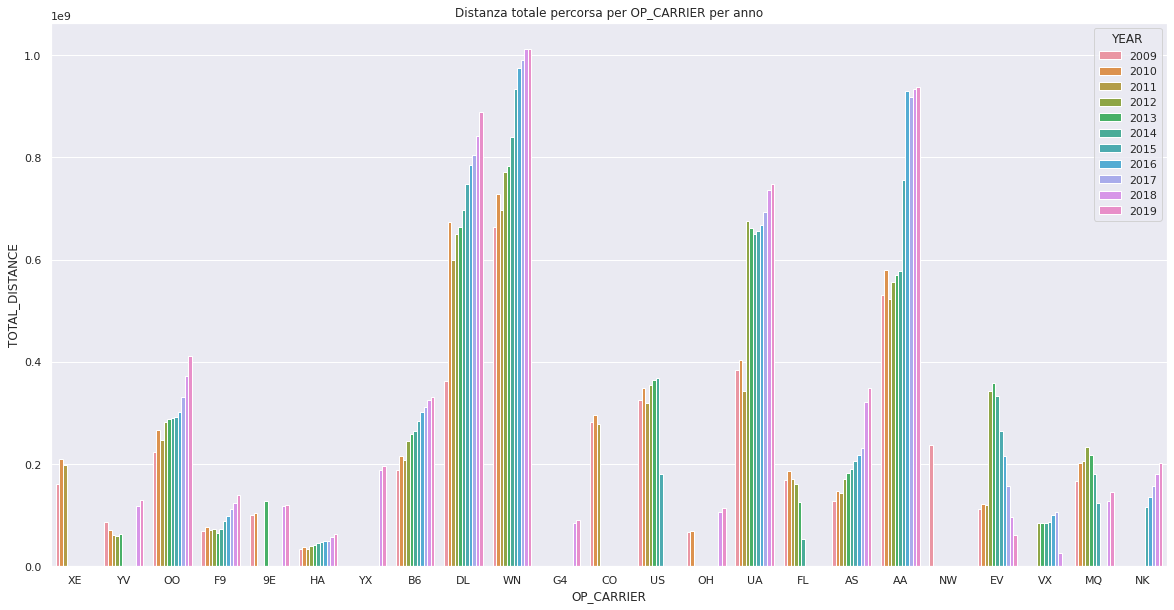

In [2]:
rows = session.execute("SELECT * FROM dist_year")
results = rows._current_rows
sns.barplot(data=results, x="OP_CARRIER", y="TOTAL_DISTANCE", hue="YEAR")
plt.title("Distanza totale percorsa per OP_CARRIER per anno")
plt.show()

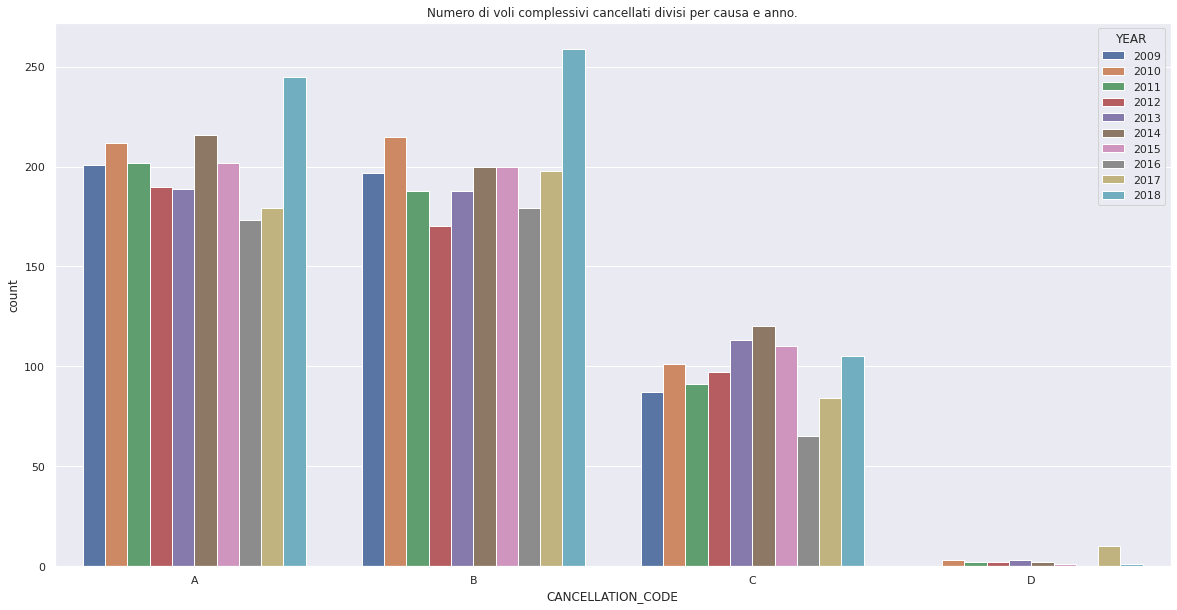

In [10]:
rows = session.execute("SELECT * FROM src_dest_canc_code")
results = rows._current_rows
sns.countplot(data=results, x="CANCELLATION_CODE", hue="YEAR")
plt.title("Numero di voli complessivi cancellati divisi per causa e anno")
plt.show()

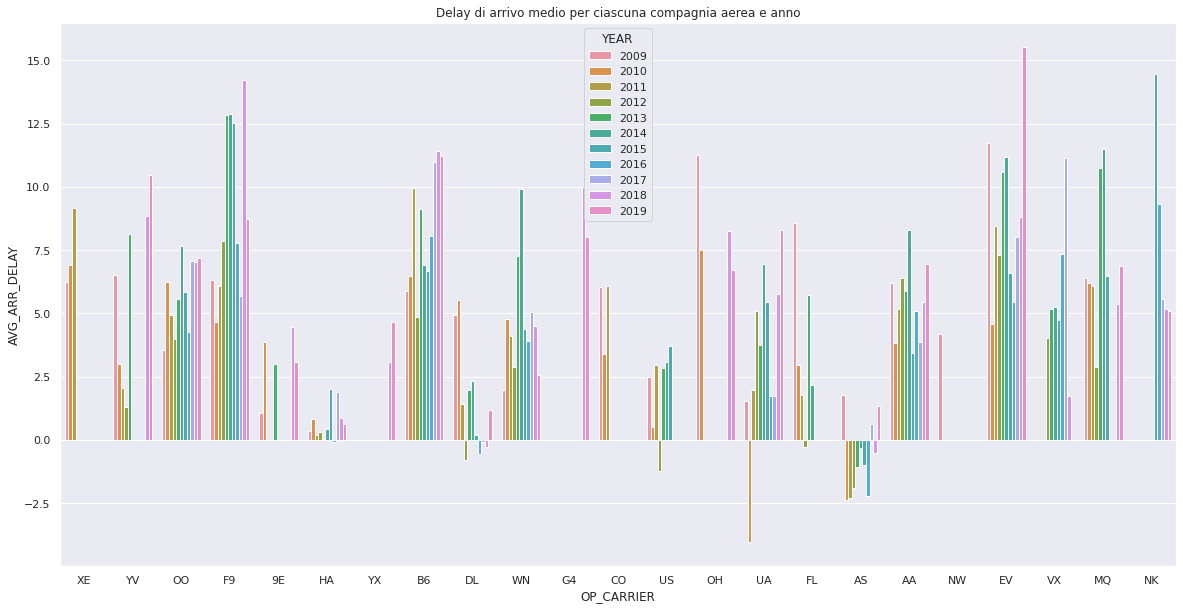

In [12]:
rows = session.execute("SELECT * FROM delay_year")
results = rows._current_rows
sns.barplot(data=results, x="OP_CARRIER", y = "AVG_ARR_DELAY", hue="YEAR")
plt.title("Delay di arrivo medio per ciascuna compagnia aerea e anno")
plt.show()

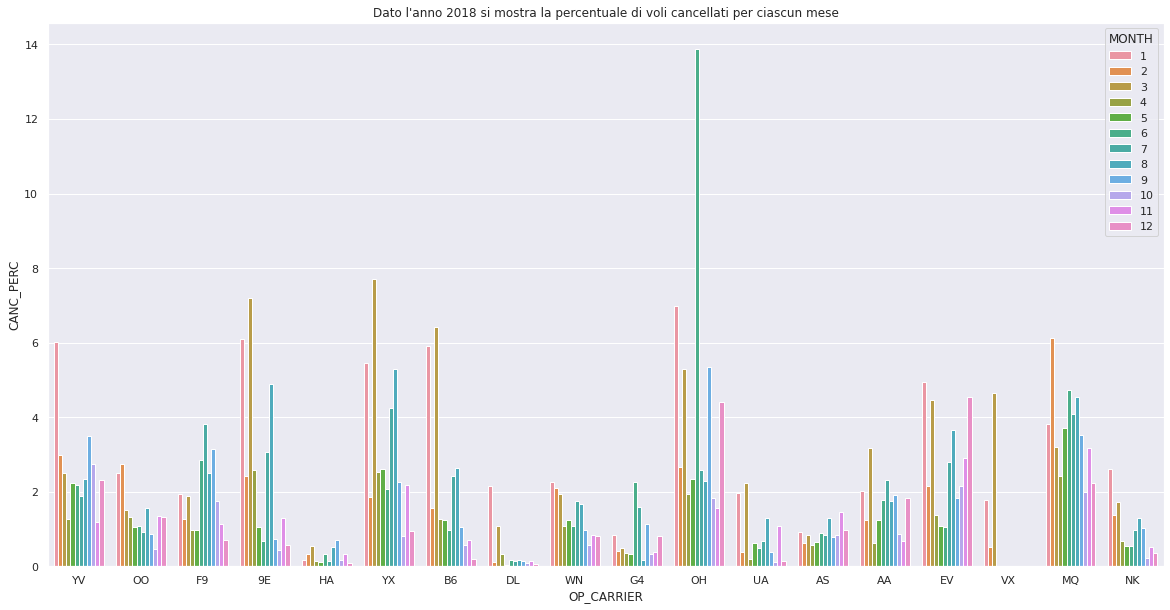

In [19]:
rows = session.execute("SELECT * FROM cancellation_diverted_year_month")
results = rows._current_rows
results = results[results["YEAR"]==2018]
sns.barplot(data=results, x="OP_CARRIER", y = "CANC_PERC", hue = "MONTH")
plt.title("Dato l'anno 2018 si mostra la percentuale di voli cancellati per ciascun OP_CARRIER e mese")
plt.show()

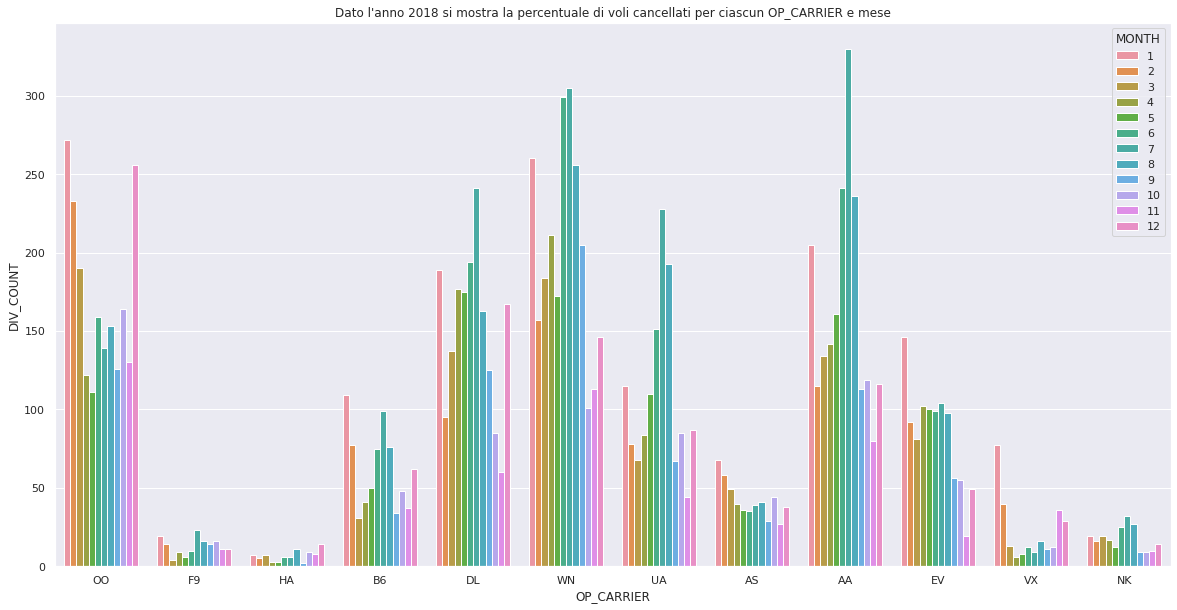

In [21]:
rows = session.execute("SELECT * FROM cancellation_diverted_year_month")
results = rows._current_rows
results = results[results["YEAR"]==2017]
sns.barplot(data=results, x="OP_CARRIER", y = "DIV_COUNT", hue = "MONTH")
plt.title("Dato l'anno 2017 si mostra il numero di voli dirottati per ciascun OP_CARRIER e mese")
plt.show()

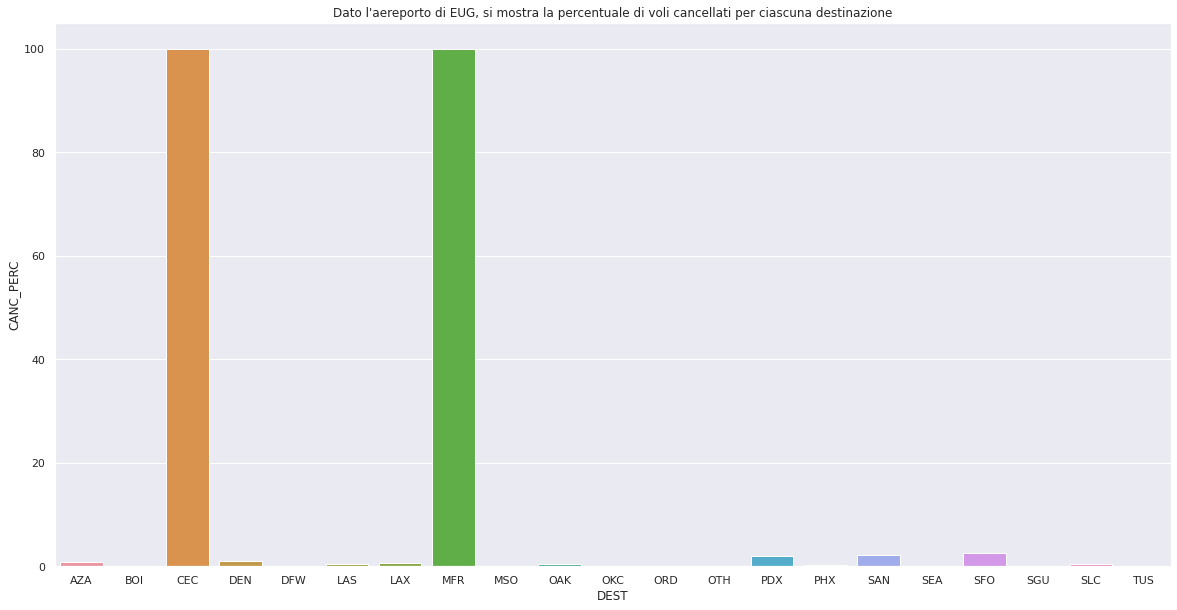

In [34]:
rows = session.execute("SELECT * FROM cancellation_diverted_total_src_dest")
results = rows._current_rows
results = results[results["ORIGIN"] == "EUG"]
sns.barplot(data=results, x=results["DEST"], y = "CANC_PERC")
plt.title("Dato l'aereporto di EUG, si mostra la percentuale di voli cancellati per ciascuna destinazione")
plt.show()

## 10 Problematiche
In questo capitolo saranno spiegate le principali problematiche incontrate durante il progetto.

### 10.1 Dataset
Inizialmente si è provato ad uniformare tramite preprocessing anche il dataset del 2020, tuttavia a differenza
di quello del 2019 anche se presenti tutte le colonne, i vari record avevano "entries" prive di significato.
Impossibilitati a inferire i record con una qualsiasi combinazione, si è scelto alla fine di non considerare l'intero anno
nelle nostre analisi.
Degna di nota è anche la lentezza delle varie computazioni, dovute alla grande dimensione del dataset (9GB), che non avevamo sperimentato durante il primo progetto.


### 10.2 MLlib
L'idea originale era quella di addestrare un modello sui dati offline,
per poi salvare i "pesi" del modello fittato su hdfs, di modo da utilizzarlo per effettuare
predizioni sui dati in streaming. Tuttavia, dopo numerose ricerche e tentativi,
abbiamo scoperto che non era possibile fare ciò, nel dettaglio la funzione save si limitava a
salvare la topologia della pipeline e i metadati associati.

### 10.3 Grafana
NodeGraph Visualization (Beta): avevamo intenzione di aggiungere un panel nella dashboard che visualizzasse in tempo reale i vari aeroporti (nodi) e che popolasse
in real-time il grafo di archi rappresentanti i voli (collegando il nodo che rappresenta l'aeroporto **ORIGIN** con il nodo relativo all'aeroporto **DEST**).
Tuttavia, nonostante il notevole tempo speso nel raffinare la query (data le limitazioni di InfluxQL) per rappresentare i dati nel formato richiesto da Grafana,
abbiamo riscontrato (e verificato anche tramite ricerche) che il tool non è ancora completo. Abbiamo tuttavia lasciato nella componente streaming il preprocessing per
questi dati, che viene salvato come report su InfluxDB.

### 10.4 InfluxDB
Il linguaggio simil SQL (InfluxQL) che adopera InfluxDB si è rivelato limitato per quelli che erano i nostri obiettivi.
Tra i limiti imposti si ha:
- L'impossibilità di eseguire *Group By* su field della timeseries (solo sui tags).
- L'impossibilità di eseguire *Where* su field della timeseries (solo sui tags).

Per raggirare tali problemi, in riferimento al tentativo di produrre un *nodegraph* per grafana si è spostato il preprocessing dei dati nella fase di Streaming Analysis.
Si specifica inoltre che la versione utilizzate per il progetto è la 1.8.9. Esiste già da tempo un versione più recente ovvero la 2.0,
tuttavia si è scelto di non adoperarla per il cambio di paradigma nella struttura del DB (sono stati introdotti i bucket).
É sufficiente pensare che inizialmente addirittura il connettore per python è stato motivo di confusione, poiché ne esistono due: uno per la versione inferiore alla 2 e l'altra per la versione superiore.

### 10.5 Cassandra

Grosso limite del connettore di datastax per cassandra per Spark Streaming (e non per Spark) è l'impossibilità
di scrivere una stream, con la funzione *writeStream()* in modalità *append*.

Per risolvere tale problematica è stata prodotta la seguente soluzione:

```python
def writing(df, i) :
    df.write \
    .format("org.apache.spark.sql.cassandra") \
    .option("keyspace", "streamingkeyspace") \
    .option("table", "delay_data") \
    .mode("append")\
    .save()

delay_query = delay_df.writeStream \
    .trigger(processingTime="10 seconds") \
    .foreachBatch(writing) \
    .outputMode("update") \
    .start()
```
In cui sostanzialmente si scrive la stream in modalità *update*, richiamando una funzione per ogni batch che scrive
con la *write* il dataframe su cassandra.

Ci auguriamo, in attesa che venga ampliato il set di modalità di scrittura per il connettore di datastax, che
tale codice possa essere utile per qualcun altro.

## 11 Osservazioni Conclusive

Nonostante le difficoltà riscontrate, il progetto alla fine ci è risultato appagante e ci ha consentito di sperimentare con maggior libertà tecnologie interessanti.



##  12 Riferimenti

- Docker: https://docs.docker.com
- Cassandra: https://cassandra.apache.org/doc/latest/
- Kafka: https://kafka.apache.org/documentation/
- Spark: https://spark.apache.org/docs/latest/
- Hadoop: https://hadoop.apache.org/docs/stable/
- MLlib: https://spark.apache.org/docs/latest/ml-guide.html
- Portainer: https://documentation.portainer.io
- Grafana: https://grafana.com/docs/
- InfluxDB: https://docs.influxdata.com/influxdb/v1.8/